In [20]:
import pystan
from pystan import StanModel
import numpy as np
import pickle
import os

model = """
data {
}
parameters {
real y;
}
model {
    y ~ von_mises(0,1);
}
"""
fit_model = StanModel(model_code=model)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c88324283aaadf3d43d98769db5ec23c NOW.


In [27]:
fit = fit_model.sampling(iter=1000, chains=1)

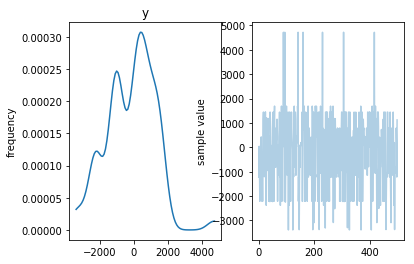

In [28]:
fit.plot()

In [1]:
import pystan
from pystan import StanModel
import numpy as np
import pickle
import os

model = """
data {
    int N;
    int M;
    real<lower=0>  V[N,M];
}
parameters {
    //real<lower=0> lambda;
    real<lower=0> W[N,2];
    real<lower=0> H[2,M];
    real eps;
}
model {
    eps ~ normal(0,1);
    for (i in 1:N)
        for (j in 1:2)
            W[i,j] ~ exponential(0.5);
        
    for (i in 1:2)
        for (j in 1:M)
            H[i,j] ~ exponential(0.5);
    
    for (i in 1:N)
        for (j in 1:M)
            V[i,j] ~ normal(W[i,1]*H[1,j]+W[i,2]*H[2,j], eps);
}
"""
data = np.matrix([[36, 3, 45, 54], \
                            [4, 34, 23, 31], \
                            [9, 65, 11, 0], \
                            [17, 3, 3, 0], \
                            [0, 14, 7, 4]])

In [3]:
data_dict = {'N': data.shape[0], 'M': data.shape[1] ,'V' : data}

if os.path.exists('model.pkl'):
    fit_model = pickle.load(open('model.pkl', 'rb'))
else:   
    with open('model.pkl', 'wb+') as f:
        fit_model = StanModel(model_code=model)
        pickle.dump(fit_model, f)
    

fit = fit_model.sampling(data=data_dict, iter=1000, chains=1)
#fit_eps = pystan.stan(model_code=model, data=data_dict, iter=1000, chains=1)
print(fit)

EOFError: Ran out of input

In [4]:
fit = fit_model.sampling(data=data_dict, iter=1000, chains=1)
#fit_eps = pystan.stan(model_code=model, data=data_dict, iter=1000, chains=1)
print(fit)

Inference for Stan model: anon_model_3af51e32c9a82cadff167620130feac4.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
W[0,0]   9.68    0.19   2.43   5.93    7.9    9.3  11.35  14.94    160   1.01
W[1,0]   3.89    0.08   1.09   2.21   3.12   3.69   4.57   6.55    204    1.0
W[2,0]   0.43    0.02   0.37 1.7e-3   0.15   0.34   0.61   1.31    398    1.0
W[3,0]   0.93    0.03   0.54    0.1   0.54   0.86   1.26   2.24    347    1.0
W[4,0]   0.69    0.02   0.49   0.04   0.32   0.59   0.93   1.92    500    1.0
W[0,1]    0.4    0.02   0.34   0.01   0.14   0.31   0.58   1.35    347    1.0
W[1,1]   3.75    0.09   1.22   1.85   2.87   3.46   4.44   6.81    198    1.0
W[2,1]   7.69    0.16    2.3   4.27   6.11   7.23   8.98  13.09    205    1.0
W[3,1]   0.49    0.02    0.4   0.02   0.19   0.42   0.67   1.56    317    1.0
W[4,1]   1.47    0.05   0.73   0.2

In [18]:
len(fit.extract()['H'])

500

In [7]:
fit.plot("W[0,0]")

KeyError: 'W[0,0]'

In [23]:
#sm = pystan.StanModel(model_code=model)

#with open('model.pkl', 'wb') as f:

op = fit_model.optimizing(data=data_dict)
print(op)

OrderedDict([('W', array([[  9.04712329e+00,   3.81444816e-03],
       [  3.88509857e+00,   3.23008255e+00],
       [  4.88722388e-01,   6.49541909e+00],
       [  9.05938447e-01,   2.04974372e-01],
       [  5.79732896e-01,   1.35448826e+00]])), ('H', array([[  3.57591586e+00,   2.98524680e-01,   4.89260178e+00,
          6.14647813e+00],
       [  1.53048708e-01,   9.90446939e+00,   1.23564797e+00,
          2.35808011e-03]])), ('eps', array(3.6941974555566297))])


In [24]:
np.matmul(op['W'], op['H'])

array([[ 32.35233545,   2.73856967,  44.2686848 ,  55.60795444],
       [ 14.38714555,  33.15205158,  22.99948513,  23.88729018],
       [  2.74174564,  64.47957526,  10.41717547,   3.01923819],
       [  3.27093072,   2.30060738,   4.68567222,   5.56881419],
       [  2.28037873,  13.58855207,   4.51007287,   3.56650956]])

In [ ]:
np.mat